In [1]:
from sklearn.preprocessing import MinMaxScaler
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\86130\00.Project\03.Datasets\\Industry power load maximun and minimun values-10-21.csv')
print(df)

                       sector type   datatime  Average Power Max（kw）  \
0     Large industrial electricity   1/1/2019            117888.3300   
1     Large industrial electricity   1/2/2019            126843.7914   
2     Large industrial electricity   1/3/2019            130286.1294   
3     Large industrial electricity   1/4/2019            133018.6344   
4     Large industrial electricity   1/5/2019            133504.4784   
...                            ...        ...                    ...   
3605          business electricity  8/27/2021            104728.8762   
3606          business electricity  8/28/2021             93855.1368   
3607          business electricity  8/29/2021             84127.1658   
3608          business electricity  8/30/2021            102851.2758   
3609          business electricity  8/31/2021             96396.2568   

      Average Power Min（kw）  
0                51526.5690  
1                63638.4294  
2               102048.2754  
3              

In [3]:
df.head()

,sector type,datatime,Average Power Max（kw）,Average Power Min（kw）
0,Large industrial electricity,1/1/2019,117888.3300,51526.5690
1,Large industrial electricity,1/2/2019,126843.7914,63638.4294
2,Large industrial electricity,1/3/2019,130286.1294,102048.2754
3,Large industrial electricity,1/4/2019,133018.6344,104466.0762
4,Large industrial electricity,1/5/2019,133504.4784,99507.3528


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sector type            3610 non-null   object 
 1   datatime               3610 non-null   object 
 2   Average Power Max（kw）  3610 non-null   float64
 3   Average Power Min（kw）  3610 non-null   float64
dtypes: float64(2), object(2)
memory usage: 112.9+ KB


In [5]:
df.rename(columns={
    'sector type': 'SectorType',
    'datatime': 'Datetime',
    'Average Power Max（kw）': 'AvgMaxPower',
    'Average Power Min（kw）': 'AvgMinPower'
}, inplace=True)
print(df)

                        SectorType   Datetime  AvgMaxPower  AvgMinPower
0     Large industrial electricity   1/1/2019  117888.3300   51526.5690
1     Large industrial electricity   1/2/2019  126843.7914   63638.4294
2     Large industrial electricity   1/3/2019  130286.1294  102048.2754
3     Large industrial electricity   1/4/2019  133018.6344  104466.0762
4     Large industrial electricity   1/5/2019  133504.4784   99507.3528
...                            ...        ...          ...          ...
3605          business electricity  8/27/2021  104728.8762   19815.7638
3606          business electricity  8/28/2021   93855.1368   20820.2490
3607          business electricity  8/29/2021   84127.1658   21679.5828
3608          business electricity  8/30/2021  102851.2758   21036.5868
3609          business electricity  8/31/2021   96396.2568   21291.3042

[3610 rows x 4 columns]


In [6]:
df.to_csv(r"C:\Users\86130\00.Project\03.Datasets\Rename_SecotrType.csv",index=True,header=True) 

In [7]:
data=pd.read_csv(r'C:\\Users\\86130\\00.Project\\03.Datasets\\Rename_SecotrType.csv',
               sep=',',  
                     index_col='Datetime',  
                     na_values=['?', 0, 'nan'],  
               parse_dates= ['Datetime'] )

In [8]:
data.head()

,Unnamed: 0,SectorType,AvgMaxPower,AvgMinPower
Datetime,,,,
2019-01-01,NaN,Large industrial electricity,117888.3300,51526.5690
2019-01-02,1.0,Large industrial electricity,126843.7914,63638.4294
2019-01-03,2.0,Large industrial electricity,130286.1294,102048.2754
2019-01-04,3.0,Large industrial electricity,133018.6344,104466.0762
2019-01-05,4.0,Large industrial electricity,133504.4784,99507.3528


In [9]:
data.drop(columns=['Unnamed: 0'], inplace=True)
print(data)

                              SectorType  AvgMaxPower  AvgMinPower
Datetime                                                          
2019-01-01  Large industrial electricity  117888.3300   51526.5690
2019-01-02  Large industrial electricity  126843.7914   63638.4294
2019-01-03  Large industrial electricity  130286.1294  102048.2754
2019-01-04  Large industrial electricity  133018.6344  104466.0762
2019-01-05  Large industrial electricity  133504.4784   99507.3528
...                                  ...          ...          ...
2021-08-27          business electricity  104728.8762   19815.7638
2021-08-28          business electricity   93855.1368   20820.2490
2021-08-29          business electricity   84127.1658   21679.5828
2021-08-30          business electricity  102851.2758   21036.5868
2021-08-31          business electricity   96396.2568   21291.3042

[3610 rows x 3 columns]


In [10]:
## Check whether there are missing values in the data set, because it is mainly based on dates, 
##and the main purpose is to check whether there are missing date data.
## Generate a desired date range
expected_dates = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')

In [11]:
# Search for missing dates
missing_dates = expected_dates[~expected_dates.isin(data.index)]

In [12]:
print(missing_dates)

DatetimeIndex(['2021-01-26'], dtype='datetime64[ns]', freq='D')


In [13]:
missing_data = pd.DataFrame(index=missing_dates, columns=data.columns)

In [14]:
merged_data = pd.concat([data, missing_data])#

In [15]:
# Sort the DataFrame by index (date)
merged_data.sort_index(inplace=True)

In [16]:
merged_data.isnull()

,SectorType,AvgMaxPower,AvgMinPower
2019-01-01,False,False,False
2019-01-01,False,False,False
2019-01-01,False,False,False
2019-01-02,False,False,False
2019-01-02,False,False,False
...,...,...,...
2021-08-30,False,False,False
2021-08-31,False,False,False
2021-08-31,False,False,False
2021-08-31,False,False,False


In [17]:
type_mapping = {
    'Large industrial electricity': 0,
    'business electricity': 1,
    'general industry': 2,
    'non-general industry': 3
}

In [18]:
merged_data['type'] = merged_data['SectorType'].map(type_mapping)

In [19]:
merged_data.head()

,SectorType,AvgMaxPower,AvgMinPower,type
2019-01-01,Large industrial electricity,117888.33,51526.569,0.0
2019-01-01,business electricity,64027.8582,23758.797,1.0
2019-01-01,general industry,6179.9364,4093.0467,2.0
2019-01-02,general industry,10711.9704,3971.5308,2.0
2019-01-02,business electricity,75467.2143,20231.6265,1.0


In [20]:
merged_data.drop(columns=['SectorType'],inplace=True)
print(merged_data)

           AvgMaxPower AvgMinPower  type
2019-01-01   117888.33   51526.569   0.0
2019-01-01  64027.8582   23758.797   1.0
2019-01-01   6179.9364   4093.0467   2.0
2019-01-02  10711.9704   3971.5308   2.0
2019-01-02  75467.2143  20231.6265   1.0
...                ...         ...   ...
2021-08-30   3316.1904   1434.9684   3.0
2021-08-31  101834.844  74755.6662   0.0
2021-08-31  10329.5676   3732.4056   2.0
2021-08-31  96396.2568  21291.3042   1.0
2021-08-31    3223.692   1401.9822   3.0

[3611 rows x 3 columns]


In [21]:
import pandas as pd
from sklearn.impute import KNNImputer

In [22]:
# Select features, only the values of the first 200 moments are used here
features = merged_data.shift(200)

In [23]:
# Standardized data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [24]:
# Initialize the KNN model and set the number of neighbors
knn_imputer = KNNImputer(n_neighbors=20)

In [25]:
# Fit KNN model and predict missing values
filled_data = knn_imputer.fit_transform(scaled_features)

In [26]:
#Reverse normalize the filled data
filled_data = scaler.inverse_transform(filled_data)

In [27]:
#Create a new dataframe
filled_df = pd.DataFrame(filled_data, columns=features.columns, index=merged_data.index)

In [28]:
print(filled_df)

            AvgMaxPower   AvgMinPower      type
2019-01-01   58815.3702  27725.447358  1.375953
2019-01-01   58815.3702  27725.447358  1.375953
2019-01-01   58815.3702  27725.447358  1.375953
2019-01-02   58815.3702  27725.447358  1.375953
2019-01-02   58815.3702  27725.447358  1.375953
...                 ...           ...       ...
2021-08-30  108759.9198  82566.153000  0.000000
2021-08-31  122974.5744  92252.353200  0.000000
2021-08-31    3446.9322   1580.499000  3.000000
2021-08-31  109148.6316  22132.219800  1.000000
2021-08-31   10711.3038   3537.055800  2.000000

[3611 rows x 3 columns]


In [29]:
start_date = '2021-01-26'
end_date = '2021-01-26'
date_range_data = filled_df.loc[start_date:end_date]

print(date_range_data)

            AvgMaxPower  AvgMinPower  type
2021-01-26     2396.085    1058.0574   3.0


In [30]:
##Insert this data into the data set data
#2021-01-26     2396.085    1058.0574   3.0  non-general f=200,n=20
#2021-01-26    7307.1804    2571.8016   2.0 general  f=50,n=20
#2021-01-26     90215.3532   48545.9706   0.0   large f=100,n=20
#2021-01-26     48199.837   3838.421     1.0   bussiness mean value

In [31]:
##Insert new data into the dataset
new_data = {
    'SectorType':['non-general industry','general industry','Large industrial electricity','business electricity'],
    'AvgMaxPower': [2396.085,7307.1804,90215.3532,48199.837],
    'AvgMinPower': [1058.0574,2571.8016,48545.9706,3838.421],
    'Datetime':['2021-01-26','2021-01-26','2021-01-26','2021-01-26']
}
#new_index = ['2021-01-26','2021-01-26','2021-01-26','2021-01-26']
new_df = pd.DataFrame(new_data)

df = pd.concat([df, new_df])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3614 entries, 0 to 3
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SectorType   3614 non-null   object 
 1   Datetime     3614 non-null   object 
 2   AvgMaxPower  3614 non-null   float64
 3   AvgMinPower  3614 non-null   float64
dtypes: float64(2), object(2)
memory usage: 141.2+ KB


In [33]:
filled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3611 entries, 2019-01-01 to 2021-08-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AvgMaxPower  3611 non-null   float64
 1   AvgMinPower  3611 non-null   float64
 2   type         3611 non-null   float64
dtypes: float64(3)
memory usage: 241.9 KB


In [34]:
filled_df.head()

,AvgMaxPower,AvgMinPower,type
2019-01-01,58815.3702,27725.447358,1.375953
2019-01-01,58815.3702,27725.447358,1.375953
2019-01-01,58815.3702,27725.447358,1.375953
2019-01-02,58815.3702,27725.447358,1.375953
2019-01-02,58815.3702,27725.447358,1.375953


In [35]:
df.head()

,SectorType,Datetime,AvgMaxPower,AvgMinPower
0,Large industrial electricity,1/1/2019,117888.3300,51526.5690
1,Large industrial electricity,1/2/2019,126843.7914,63638.4294
2,Large industrial electricity,1/3/2019,130286.1294,102048.2754
3,Large industrial electricity,1/4/2019,133018.6344,104466.0762
4,Large industrial electricity,1/5/2019,133504.4784,99507.3528


In [36]:
Type_mapping = {
    'Large industrial electricity': 1,
    'business electricity': 2,
    'general industry': 3,
    'non-general industry': 4,
}

In [37]:
df['Type'] = df['SectorType'].map(Type_mapping)

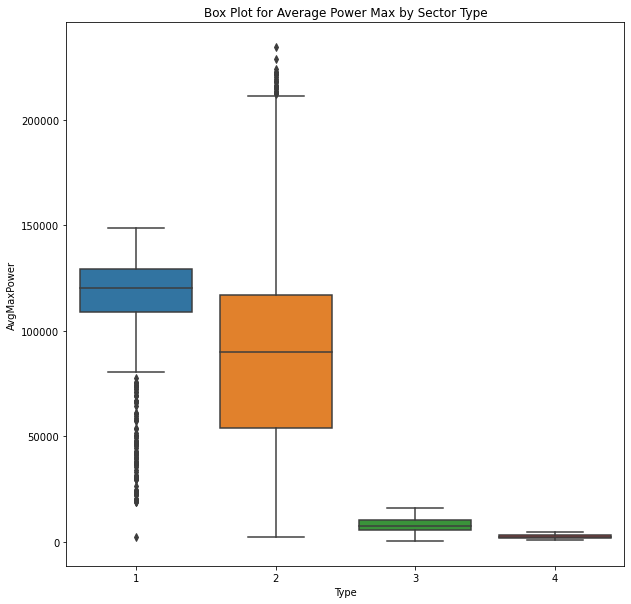

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.boxplot(x='Type', y='AvgMaxPower', data=df)
plt.title('Box Plot for Average Power Max by Sector Type')
plt.show()

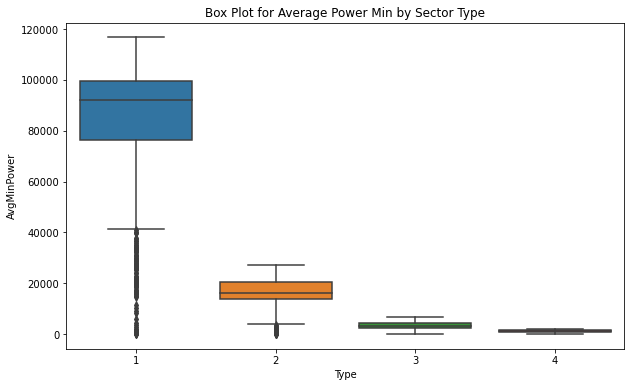

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='AvgMinPower', data=df)
plt.title('Box Plot for Average Power Min by Sector Type')
plt.show()

Outliers:
                       SectorType   Datetime  AvgMaxPower  AvgMinPower  Type
2    Large industrial electricity   1/3/2019  130286.1294  102048.2754     1
3    Large industrial electricity   1/4/2019  133018.6344  104466.0762     1
4    Large industrial electricity   1/5/2019  133504.4784   99507.3528     1
6    Large industrial electricity   1/7/2019  130310.5716  103008.1572     1
8    Large industrial electricity   1/9/2019  125720.6202   99121.3170     1
..                            ...        ...          ...          ...   ...
887  Large industrial electricity   6/7/2021  123254.8758  101847.1164     1
889  Large industrial electricity   6/9/2021  121435.6242   99032.2128     1
890  Large industrial electricity  6/10/2021  122073.8082   98488.9746     1
896  Large industrial electricity  6/16/2021  128984.0976   98488.2150     1
918  Large industrial electricity   7/8/2021  128415.8454   98566.6062     1

[304 rows x 5 columns]


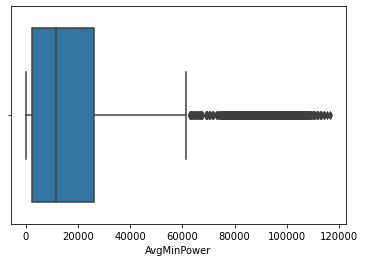

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and column_name is the column you want to plot
sns.boxplot(x=df['AvgMinPower'])

# Calculate the IQR (Interquartile Range)
Q1 = df['AvgMinPower'].quantile(0.25)
Q3 = df['AvgMinPower'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Identify outliers
outliers = df[(df['AvgMinPower'] < lower_bound) | (df['AvgMinPower'] > upper_bound)]

# Annotate the outliers on the plot
for index, value in outliers['AvgMinPower'].items():
    plt.annotate(f"{value:.2f}", (index, value), textcoords="offset points", xytext=(0, 10), ha='center')
# Print the exact values of outliers
print("Outliers:")
print(outliers)
# Show the plot
plt.show()

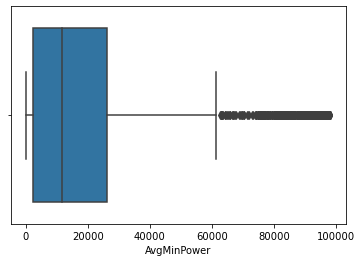

In [41]:
# 替换异常值
mean_value = df['AvgMinPower'].mean()
df['AvgMinPower'] = df['AvgMinPower'].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

# 再次画出箱线图以验证结果
sns.boxplot(x=df['AvgMinPower'])
plt.show()

Outliers:
Empty DataFrame
Columns: [SectorType, Datetime, AvgMaxPower, AvgMinPower, Type]
Index: []


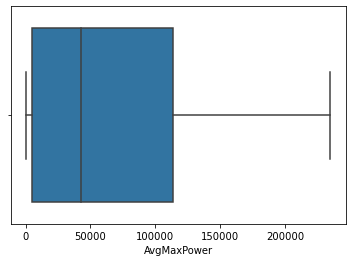

In [42]:
# Assuming df is your DataFrame and column_name is the column you want to plot
sns.boxplot(x=df['AvgMaxPower'])

# Calculate the IQR (Interquartile Range)
Q1 = df['AvgMaxPower'].quantile(0.25)
Q3 = df['AvgMaxPower'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Identify outliers
outliers = df[(df['AvgMaxPower'] < lower_bound) | (df['AvgMaxPower'] > upper_bound)]

# Annotate the outliers on the plot
for index, value in outliers['AvgMaxPower'].items():
    plt.annotate(f"{value:.2f}", (index, value), textcoords="offset points", xytext=(0, 10), ha='center')
# Print the exact values of outliers
print("Outliers:")
print(outliers)
# Show the plot
plt.show()

<AxesSubplot:>

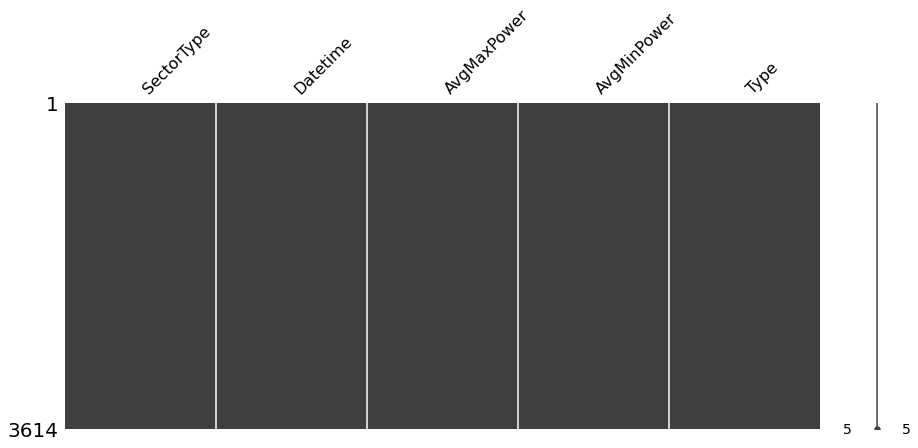

In [43]:
import missingno as mno
mno.matrix(df, figsize = (15, 6))

In [44]:
from sklearn.preprocessing import LabelEncoder

# Create one LabelEncoder
label_encoder = LabelEncoder()

# Label-encode the columns that need to be encoded
columns_to_label_encode = ['SectorType']
for col in columns_to_label_encode:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Print the modified DataFrame
print(df)

                        SectorType    Datetime  AvgMaxPower   AvgMinPower  \
0     Large industrial electricity    1/1/2019  117888.3300  51526.569000   
1     Large industrial electricity    1/2/2019  126843.7914  63638.429400   
2     Large industrial electricity    1/3/2019  130286.1294  27590.812169   
3     Large industrial electricity    1/4/2019  133018.6344  27590.812169   
4     Large industrial electricity    1/5/2019  133504.4784  27590.812169   
...                            ...         ...          ...           ...   
3609          business electricity   8/31/2021   96396.2568  21291.304200   
0             non-general industry  2021-01-26    2396.0850   1058.057400   
1                 general industry  2021-01-26    7307.1804   2571.801600   
2     Large industrial electricity  2021-01-26   90215.3532  48545.970600   
3             business electricity  2021-01-26   48199.8370   3838.421000   

      Type  SectorType_encoded  
0        1                   0  
1        

In [45]:
#filtered_data = df[df['SectorType_encoded'] == 2]
#print(filtered_data )

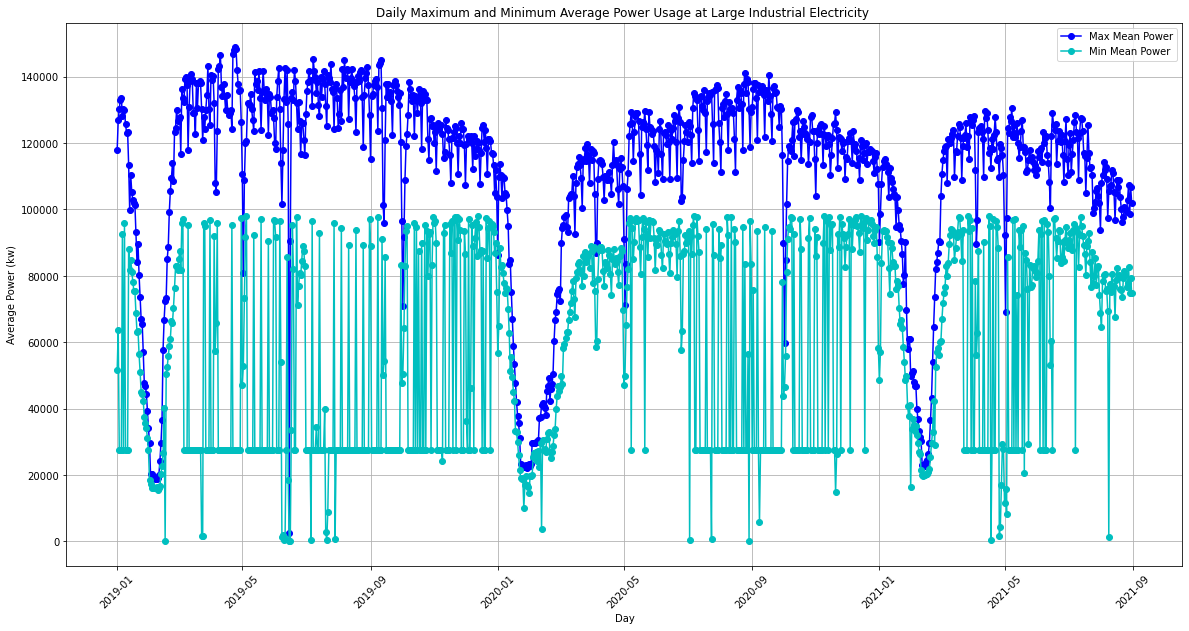

In [46]:
import pandas as pd
import matplotlib.pyplot as plt


df.index = pd.to_datetime(df.Datetime)
df = df.sort_index()

# Filter out the required data (e.g. 'Large industrial electricity' department)
df_filtered = df[df['SectorType'] == 'Large industrial electricity']

# Extract the monthly maximum average electricity load and minimum average electricity load
daily_max_power = df_filtered.resample('D').max()
daily_min_power = df_filtered.resample('D').min()

# Draw monthly maximum and minimum average electricity load line chart
plt.figure(figsize=(20, 10))
plt.plot(daily_max_power.index, daily_max_power['AvgMaxPower'], marker='o', linestyle='-', color='b', label='Max Mean Power')
plt.plot(daily_min_power.index, daily_min_power['AvgMinPower'], marker='o', linestyle='-', color='c', label='Min Mean Power')
plt.title('Daily Maximum and Minimum Average Power Usage at Large Industrial Electricity ')
plt.xlabel('Day')
plt.ylabel('Average Power (kw)')
plt.grid(True)
plt.xticks(rotation=45)  
plt.legend()
plt.show()

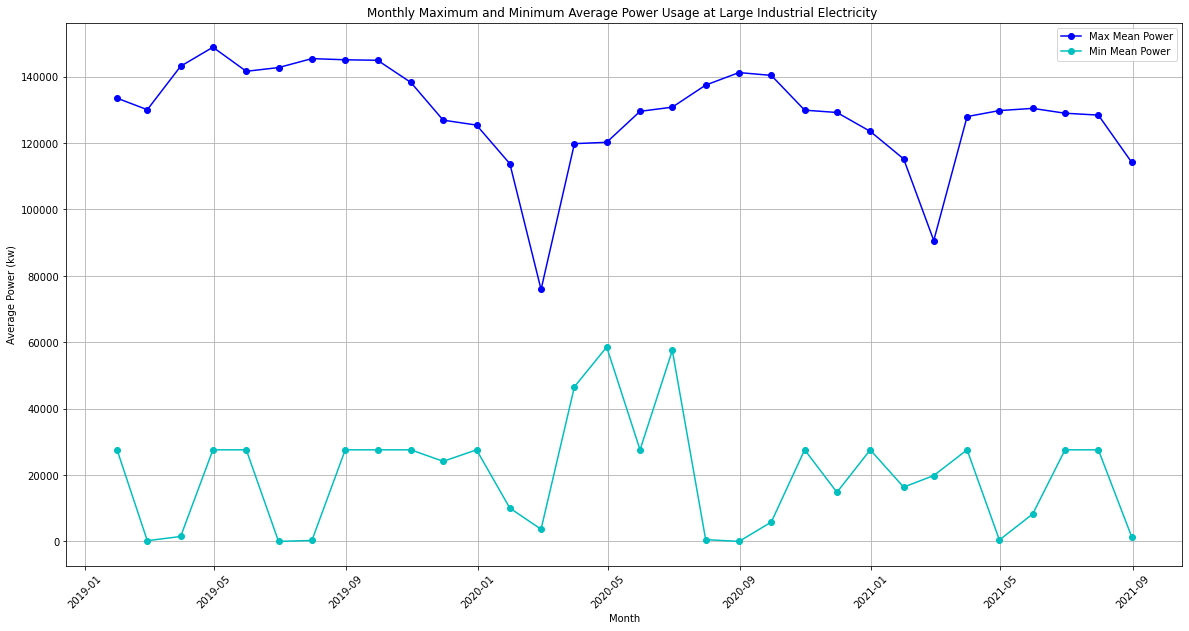

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


df.index = pd.to_datetime(df.Datetime)
df = df.sort_index()


df_filtered = df[df['SectorType'] == 'Large industrial electricity']

monthly_max_power = df_filtered.resample('M').max()
monthly_min_power = df_filtered.resample('M').min()

plt.figure(figsize=(20, 10))
plt.plot(monthly_max_power.index, monthly_max_power['AvgMaxPower'], marker='o', linestyle='-', color='b', label='Max Mean Power')
plt.plot(monthly_min_power.index, monthly_min_power['AvgMinPower'], marker='o', linestyle='-', color='c', label='Min Mean Power')
plt.title('Monthly Maximum and Minimum Average Power Usage at Large Industrial Electricity ')
plt.xlabel('Month')
plt.ylabel('Average Power (kw)')
plt.grid(True)
plt.xticks(rotation=45)  
plt.legend()
plt.show()

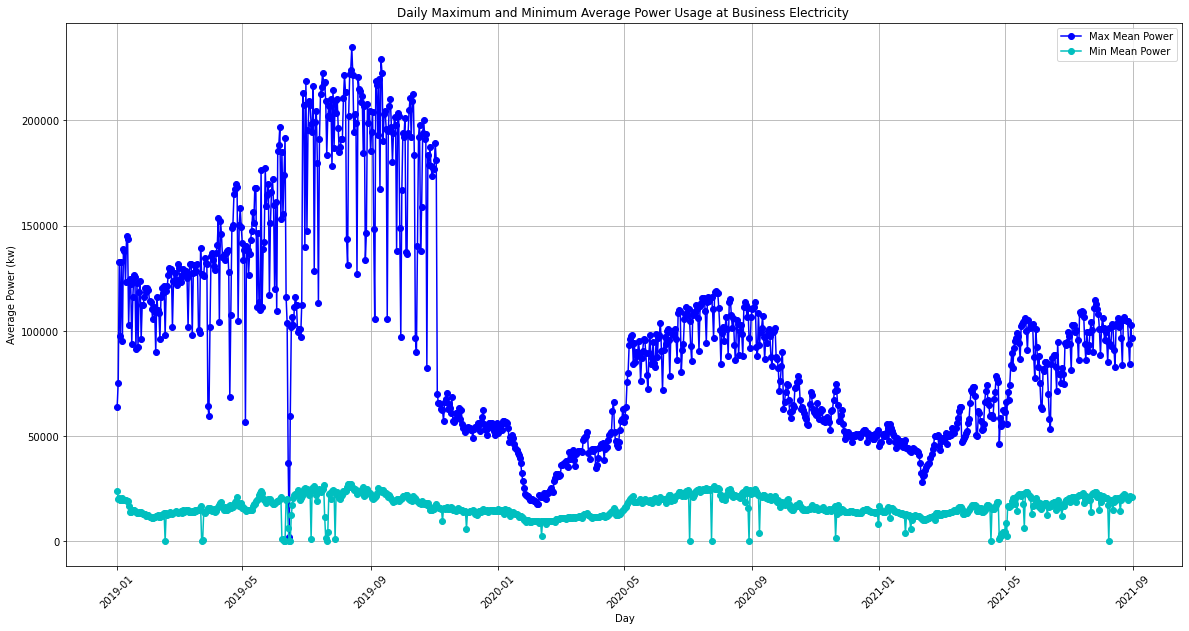

In [48]:
df.index = pd.to_datetime(df.Datetime)
df = df.sort_index()


df_filtered = df[df['SectorType'] == 'business electricity']


daily_max_power = df_filtered.resample('D').max()
daily_min_power = df_filtered.resample('D').min()


plt.figure(figsize=(20, 10))
plt.plot(daily_max_power.index, daily_max_power['AvgMaxPower'], marker='o', linestyle='-', color='b', label='Max Mean Power')
plt.plot(daily_min_power.index, daily_min_power['AvgMinPower'], marker='o', linestyle='-', color='c', label='Min Mean Power')
plt.title('Daily Maximum and Minimum Average Power Usage at Business Electricity ')
plt.xlabel('Day')
plt.ylabel('Average Power (kw)')
plt.grid(True)
plt.xticks(rotation=45)  
plt.legend()
plt.show()

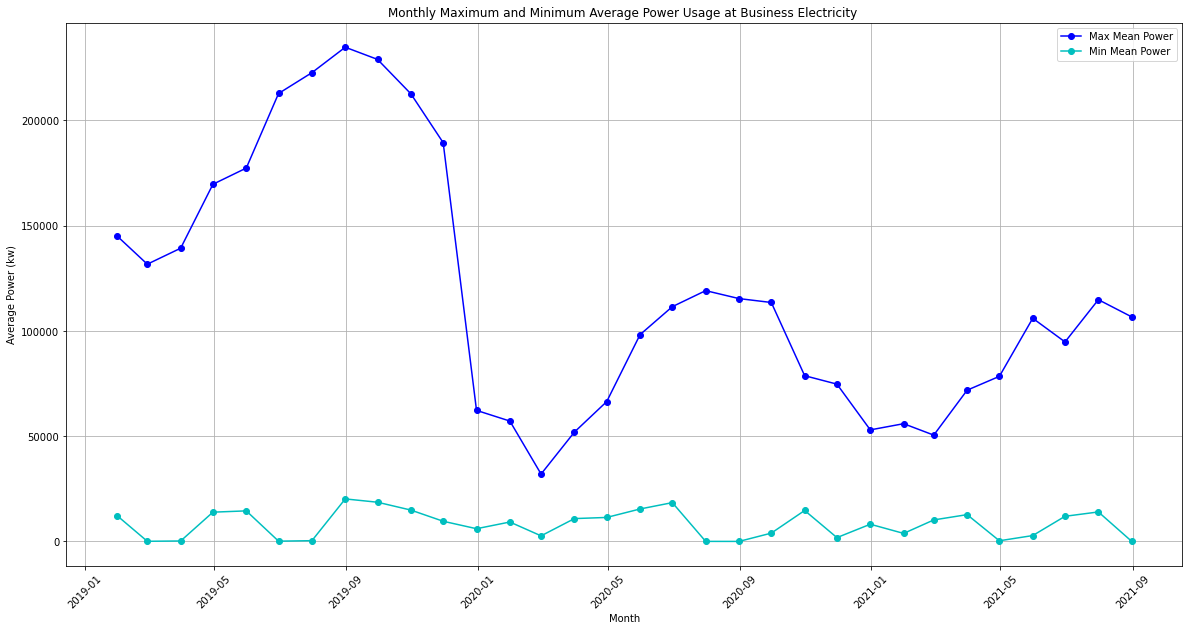

In [49]:
df.index = pd.to_datetime(df.Datetime)
df = df.sort_index()


df_filtered = df[df['SectorType'] == 'business electricity']


monthly_max_power = df_filtered.resample('M').max()
monthly_min_power = df_filtered.resample('M').min()


plt.figure(figsize=(20, 10))
plt.plot(monthly_max_power.index, monthly_max_power['AvgMaxPower'], marker='o', linestyle='-', color='b', label='Max Mean Power')
plt.plot(monthly_min_power.index, monthly_min_power['AvgMinPower'], marker='o', linestyle='-', color='c', label='Min Mean Power')
plt.title('Monthly Maximum and Minimum Average Power Usage at Business Electricity ')
plt.xlabel('Month')
plt.ylabel('Average Power (kw)')
plt.grid(True)
plt.xticks(rotation=45)  
plt.legend()
plt.show()

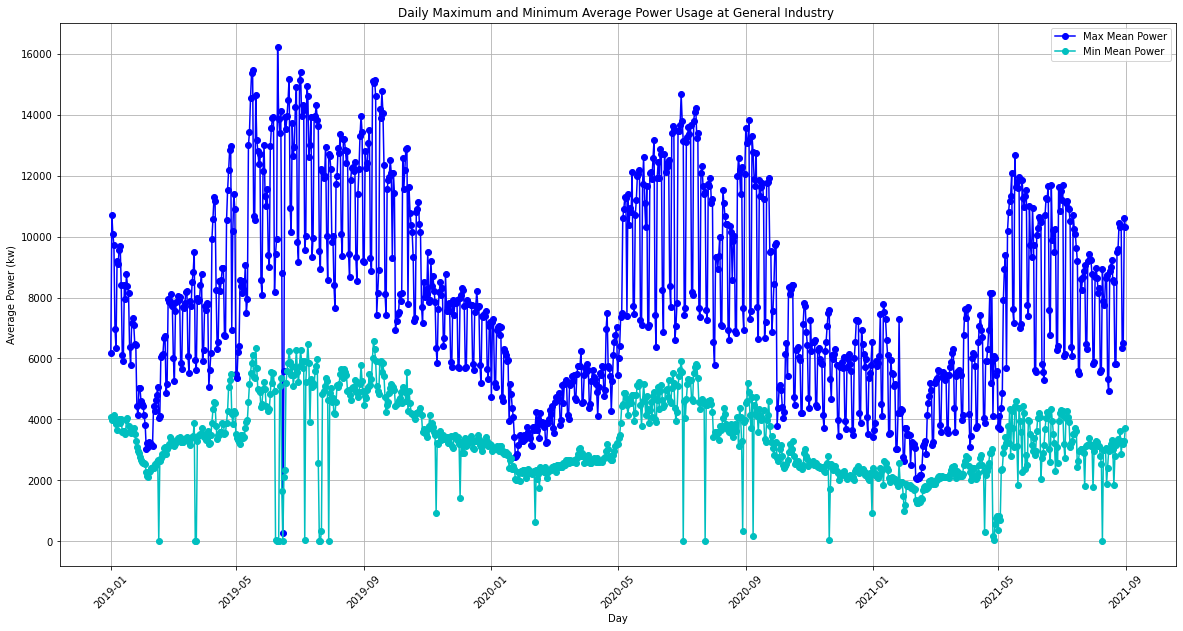

In [50]:
df.index = pd.to_datetime(df.Datetime)
df = df.sort_index()


df_filtered = df[df['SectorType'] == 'general industry']

daily_max_power = df_filtered.resample('D').max()
daily_min_power = df_filtered.resample('D').min()


plt.figure(figsize=(20, 10))
plt.plot(daily_max_power.index, daily_max_power['AvgMaxPower'], marker='o', linestyle='-', color='b', label='Max Mean Power')
plt.plot(daily_min_power.index, daily_min_power['AvgMinPower'], marker='o', linestyle='-', color='c', label='Min Mean Power')
plt.title('Daily Maximum and Minimum Average Power Usage at General Industry ')
plt.xlabel('Day')
plt.ylabel('Average Power (kw)')
plt.grid(True)
plt.xticks(rotation=45)  
plt.legend()
plt.show()

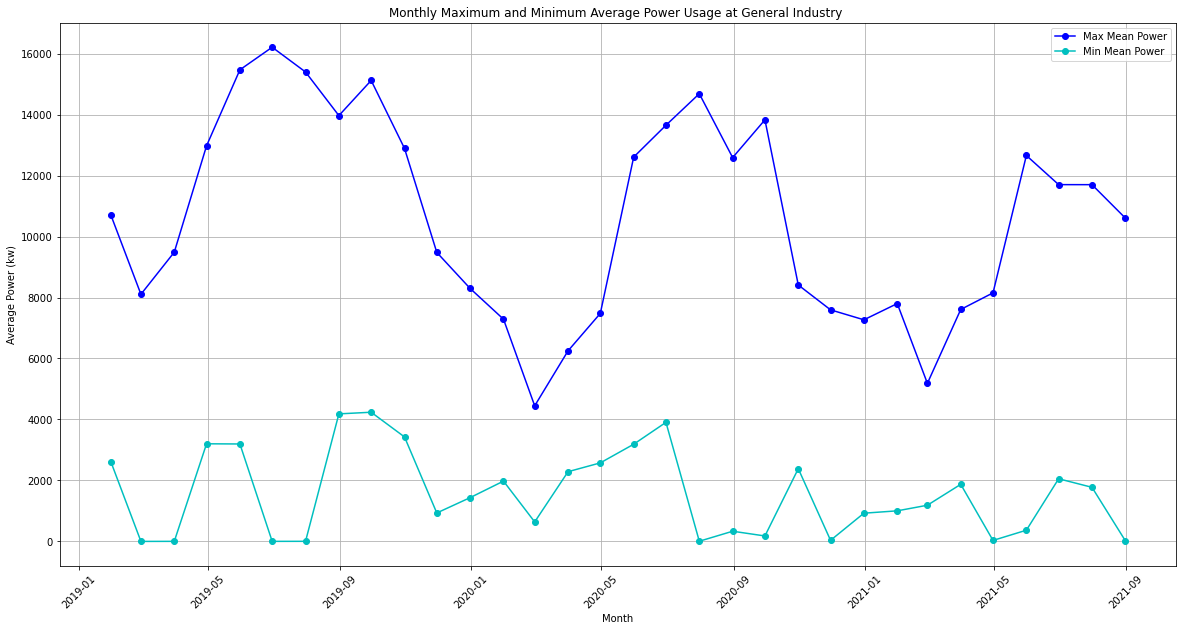

In [51]:
df.index = pd.to_datetime(df.Datetime)
df = df.sort_index()


df_filtered = df[df['SectorType'] == 'general industry']


monthly_max_power = df_filtered.resample('M').max()
monthly_min_power = df_filtered.resample('M').min()


plt.figure(figsize=(20, 10))
plt.plot(monthly_max_power.index, monthly_max_power['AvgMaxPower'], marker='o', linestyle='-', color='b', label='Max Mean Power')
plt.plot(monthly_min_power.index, monthly_min_power['AvgMinPower'], marker='o', linestyle='-', color='c', label='Min Mean Power')
plt.title('Monthly Maximum and Minimum Average Power Usage at General Industry ')
plt.xlabel('Month')
plt.ylabel('Average Power (kw)')
plt.grid(True)
plt.xticks(rotation=45) 
plt.legend()
plt.show()

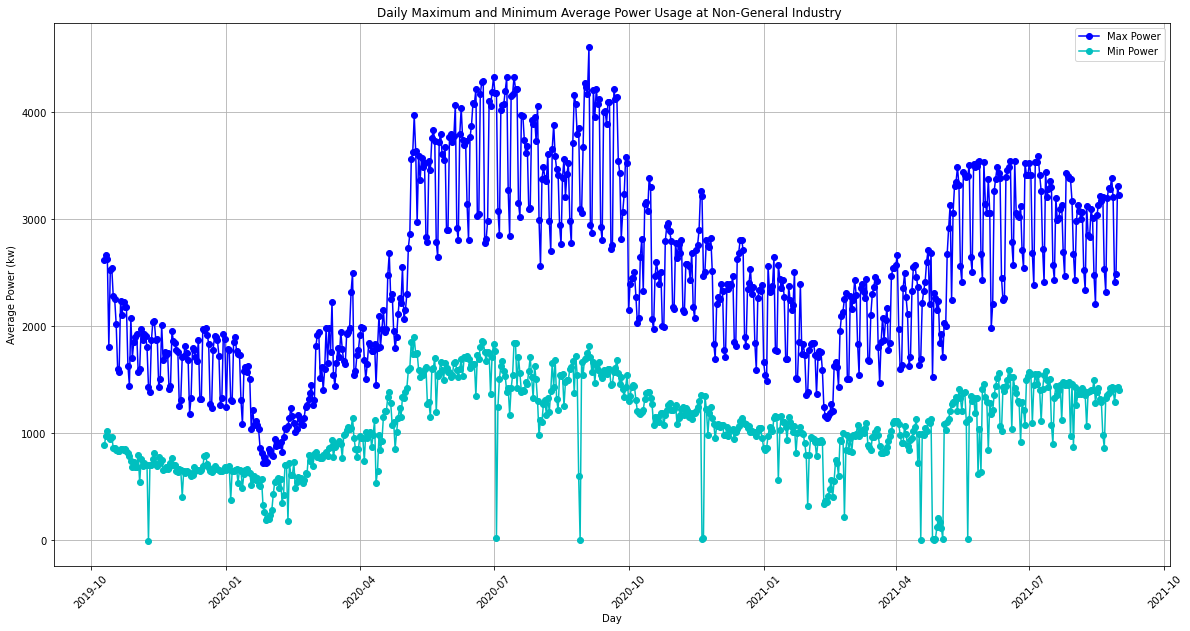

In [52]:
df.index = pd.to_datetime(df.Datetime)
df = df.sort_index()


df_filtered = df[df['SectorType'] == 'non-general industry']


daily_max_power = df_filtered.resample('D').max()
daily_min_power = df_filtered.resample('D').min()


plt.figure(figsize=(20, 10))
plt.plot(daily_max_power.index, daily_max_power['AvgMaxPower'], marker='o', linestyle='-', color='b', label='Max Power')
plt.plot(daily_min_power.index, daily_min_power['AvgMinPower'], marker='o', linestyle='-', color='c', label='Min Power')
plt.title('Daily Maximum and Minimum Average Power Usage at Non-General Industry ')
plt.xlabel('Day')
plt.ylabel('Average Power (kw)')
plt.grid(True)
plt.xticks(rotation=45)  
plt.legend()
plt.show()

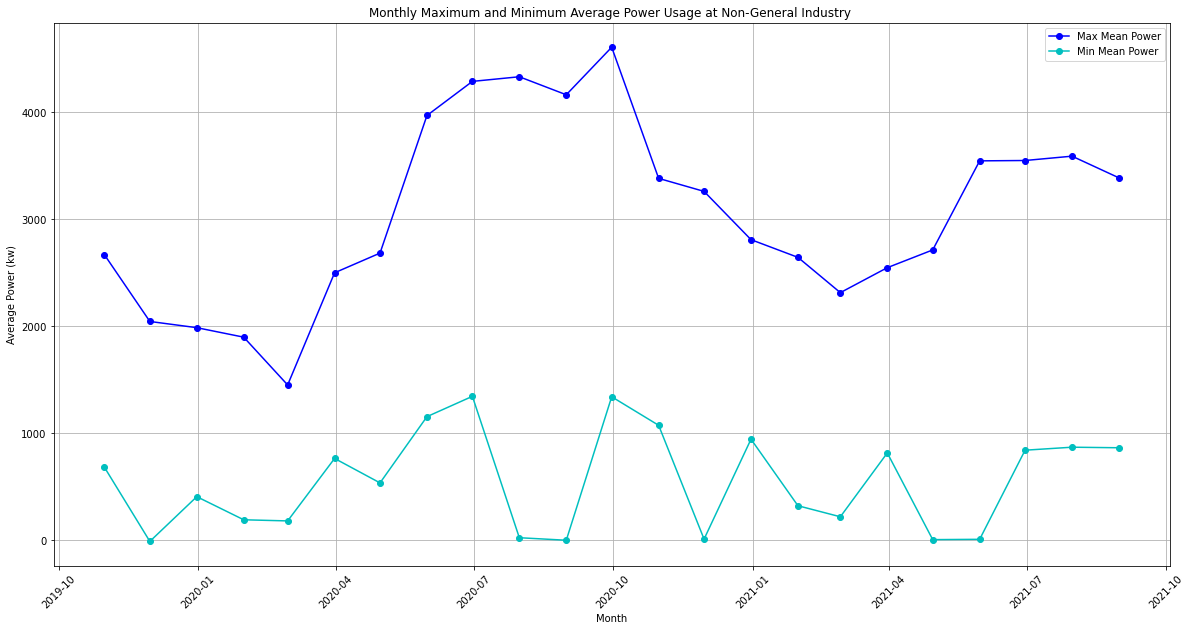

In [53]:
df.index = pd.to_datetime(df.Datetime)
df = df.sort_index()


df_filtered = df[df['SectorType'] == 'non-general industry']


monthly_max_power = df_filtered.resample('M').max()
monthly_min_power = df_filtered.resample('M').min()


plt.figure(figsize=(20, 10))
plt.plot(monthly_max_power.index, monthly_max_power['AvgMaxPower'], marker='o', linestyle='-', color='b', label='Max Mean Power')
plt.plot(monthly_min_power.index, monthly_min_power['AvgMinPower'], marker='o', linestyle='-', color='c', label='Min Mean Power')
plt.title('Monthly Maximum and Minimum Average Power Usage at Non-General Industry ')
plt.xlabel('Month')
plt.ylabel('Average Power (kw)')
plt.grid(True)
plt.xticks(rotation=45) 
plt.legend()
plt.show()

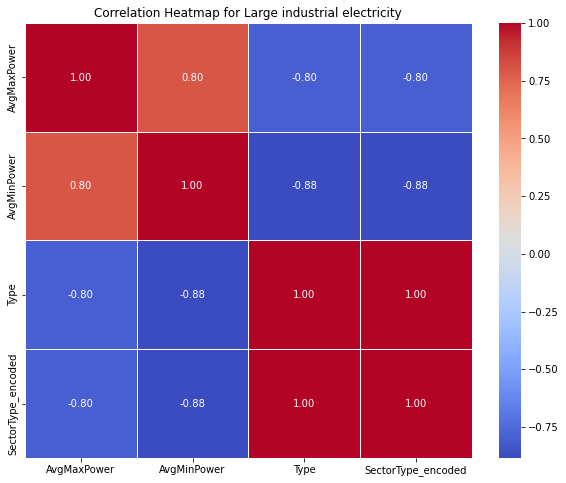

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sectortype' is a column in your DataFrame
#largeindustry_df = df[df['SectorType'] == 'Large industrial electricity']

# Calculate the correlation matrix for the 'large industry' sector
correlation_matrix_large = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_large, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for Large industrial electricity')
plt.show()

In [54]:
df.to_csv(r"C:\Users\86130\00.Project\00.Data Preprocessing\AfterProcessing_IndustryElectric.csv",index=True,header=True) 